In [103]:
import pandas as pd
from sqlalchemy import create_engine
from dbkeys import param_dic
import psycopg2
import matplotlib.pyplot as plt    

In [104]:
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [105]:
conn = connect(param_dic)

Connecting to the PostgreSQL database...
Connection successful


In [106]:
salaries = pd.read_sql("SELECT * FROM salaries", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)
departments = pd.read_sql("SELECT * FROM departments", conn)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)

In [107]:
avg_salaries = salaries['salary'].mean()
avg_salaries

52970.732451403885

In [108]:
salary_employees_df = pd.merge(employees, salaries, on="emp_no", how="inner")
salary_employees_df.rename(columns={"emp_title_id":"title_id"}, inplace=True)

In [109]:
salary_employees_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [110]:
salary_employees_titles = pd.merge(salary_employees_df, titles, on="title_id", how="inner")
salary_employees_titles.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [140]:
avg_salary_title = salary_employees_titles.groupby(["title"])["salary"].mean()
avg_salary_title_df = pd.DataFrame(new)
avg_salary_title_df = avg_salary_title_df.reset_index()
avg_salary_title_df

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


In [145]:
xticklabels = ['Assistant Engineer', 'Engineer', 'Manager', 'Senior Engineer', 
          'Senior Staff', 'Staff', 'Technique Leader']

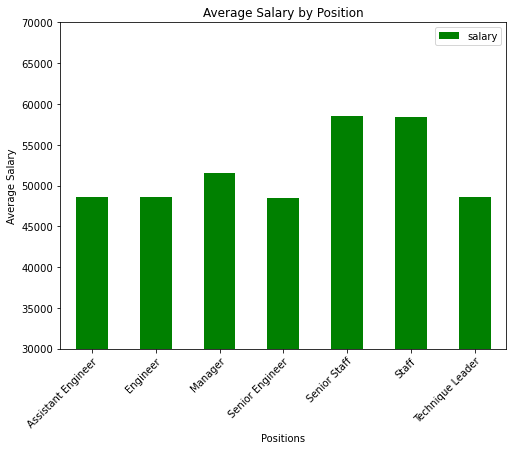

In [149]:
fig1 = avg_salary_title_df.plot(kind="bar", color = ["green"], figsize=(8,6),
title = "Average Salary by Position", xlabel = "Positions", ylabel = "Average Salary")
fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.ylim(30000, 70000)
plt.show()
